# 📝 Exercise M4.05
In the previous notebook, we presented a non-penalized **logistic regression
classifier**. This classifier accepts a parameter `penalty` to add a
regularization. The **regularization strength** is set using the **parameter `C`**.

In this exercise, we ask you to train a **l2-penalized** logistic regression
classifier and to find by yourself the **effect of the parameter `C`**.

We start by loading the dataset and create the helper function to show
the **decision boundary** as in the previous code.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split

penguins = pd.read_csv("../datasets/penguins_classification.csv")
# only keep the Adelie and Chinstrap classes
penguins = penguins.set_index("Species").loc[
    ["Adelie", "Chinstrap"]].reset_index()

culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"
data, target = penguins[culmen_columns], penguins[target_column]

data_train, data_test, target_train, target_test = train_test_split(
    data, target, stratify=target, random_state=0,
)
range_features = {
    feature_name: (data[feature_name].min() - 1, data[feature_name].max() + 1)
    for feature_name in data
}

In [34]:
import numpy as np
import matplotlib.pyplot as plt


def plot_decision_function(fitted_classifier, range_features, ax=None):
    """Plot the boundary of the decision function of a classifier."""
    from sklearn.preprocessing import LabelEncoder

    feature_names = list(range_features.keys())
    # create a grid to evaluate all possible samples
    plot_step = 0.02
    xx, yy = np.meshgrid(
        np.arange(*range_features[feature_names[0]], plot_step),
        np.arange(*range_features[feature_names[1]], plot_step),
    )

    # compute the associated prediction
    Z = fitted_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = LabelEncoder().fit_transform(Z)
    Z = Z.reshape(xx.shape)

    # make the plot of the boundary and the data samples
    if ax is None:
        _, ax = plt.subplots()
    ax.contourf(xx, yy, Z, alpha=0.4, cmap="RdBu")
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])

    return ax

Given the following candidate for the **parameter `C`**, find out what is the
**effect** of the value of this parameter **on** the **decision boundary** and on the
**weights magnitude**.

In [35]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

Cs = [0.01, 0.1, 1, 10]
model = make_pipeline(
    StandardScaler(), LogisticRegression(penalty="l2"))

In [36]:
model.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('logisticregression', LogisticRegression())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression__max_iter': 100,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': None,
 'logisticregression__solver': 'lbfgs',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False}

array([[ 0.47808726, -0.03548662]])

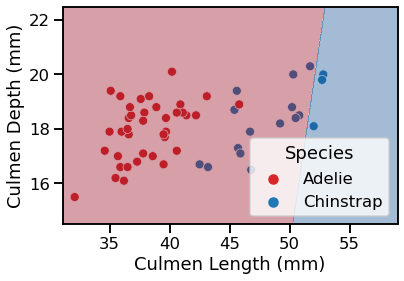

In [37]:
import seaborn as sns

model.set_params(logisticregression__C=Cs[0]).fit(data_train, target_train)
ax = sns.scatterplot(data=data_test, x=culmen_columns[0], y=culmen_columns[1], hue=target_test, palette=["tab:red", "tab:blue"])
plot_decision_function(model, range_features, ax=ax)
model.get_params()['logisticregression'].coef_

array([[ 1.76116224, -0.3530518 ]])

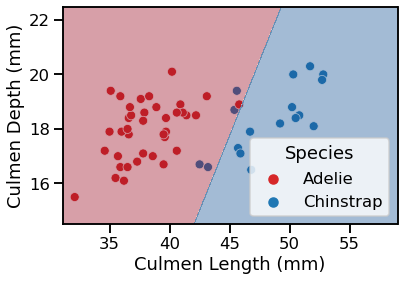

In [38]:
model.set_params(logisticregression__C=Cs[1]).fit(data_train, target_train)
ax = sns.scatterplot(data=data_test, x=culmen_columns[0], y=culmen_columns[1], hue=target_test, palette=["tab:red", "tab:blue"])
plot_decision_function(model, range_features, ax=ax)
model.get_params()['logisticregression'].coef_

array([[ 3.84178164, -1.17674507]])

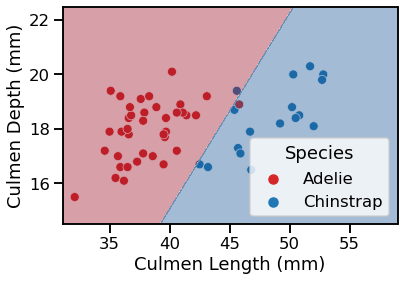

In [39]:
model.set_params(logisticregression__C=Cs[2]).fit(data_train, target_train)
ax = sns.scatterplot(data=data_test, x=culmen_columns[0], y=culmen_columns[1], hue=target_test, palette=["tab:red", "tab:blue"])
plot_decision_function(model, range_features, ax=ax)
model.get_params()['logisticregression'].coef_

array([[ 7.02466625, -2.69115919]])

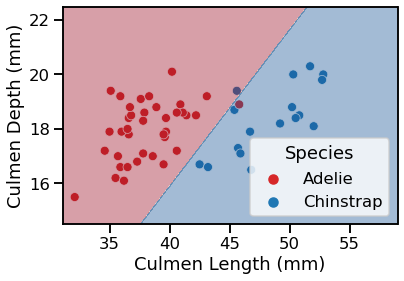

In [40]:
model.set_params(logisticregression__C=Cs[3]).fit(data_train, target_train)
ax = sns.scatterplot(data=data_test, x=culmen_columns[0], y=culmen_columns[1], hue=target_test, palette=["tab:red", "tab:blue"])
plot_decision_function(model, range_features, ax=ax)
model.get_params()['logisticregression'].coef_